In [2]:
import argparse
import glob
from typing import List

import numpy as np
import pandas as pd

from computeFeat import compute_features

from hrvanalysis import (
    remove_outliers,
    remove_ectopic_beats,
    interpolate_nan_values,
    get_time_domain_features,
    get_csi_cvi_features,
    get_sampen,
    get_poincare_plot_features,
    get_frequency_domain_features,
)

In [3]:
files_path = "/home/aura-sakhite/seizure_detection_pipeline/output/res-v0_6/PAT_7/*.csv"

In [4]:
patient_7_files = glob.glob(files_path, recursive = True)
print("Len : ", len(patient_7_files))
patient_7_files

Len :  43


['/home/aura-sakhite/seizure_detection_pipeline/output/res-v0_6/PAT_7/rr_EEG_491_s10.csv',
 '/home/aura-sakhite/seizure_detection_pipeline/output/res-v0_6/PAT_7/rr_EEG_491_s11.csv',
 '/home/aura-sakhite/seizure_detection_pipeline/output/res-v0_6/PAT_7/rr_EEG_491_s12.csv',
 '/home/aura-sakhite/seizure_detection_pipeline/output/res-v0_6/PAT_7/rr_EEG_491_s13.csv',
 '/home/aura-sakhite/seizure_detection_pipeline/output/res-v0_6/PAT_7/rr_EEG_491_s14.csv',
 '/home/aura-sakhite/seizure_detection_pipeline/output/res-v0_6/PAT_7/rr_EEG_491_s15.csv',
 '/home/aura-sakhite/seizure_detection_pipeline/output/res-v0_6/PAT_7/rr_EEG_491_s16.csv',
 '/home/aura-sakhite/seizure_detection_pipeline/output/res-v0_6/PAT_7/rr_EEG_491_s17.csv',
 '/home/aura-sakhite/seizure_detection_pipeline/output/res-v0_6/PAT_7/rr_EEG_491_s18.csv',
 '/home/aura-sakhite/seizure_detection_pipeline/output/res-v0_6/PAT_7/rr_EEG_491_s19.csv',
 '/home/aura-sakhite/seizure_detection_pipeline/output/res-v0_6/PAT_7/rr_EEG_491_s1.csv',


In [5]:
patient_7_files[0]

'/home/aura-sakhite/seizure_detection_pipeline/output/res-v0_6/PAT_7/rr_EEG_491_s10.csv'

In [6]:
df_rr_intervals491_s10 = pd.read_csv(patient_7_files[0])

In [7]:
df_rr_intervals491_s10

,timestamp,frame,rr_interval
0,2017-04-10 23:36:55.765625000,196,750.00000
1,2017-04-10 23:36:56.515625000,388,753.90625
2,2017-04-10 23:36:57.269531250,581,710.93750
3,2017-04-10 23:36:57.980468750,763,699.21875
4,2017-04-10 23:36:58.679687500,942,738.28125
...,...,...,...
96,2017-04-10 23:38:00.761718750,16835,687.50000
97,2017-04-10 23:38:01.449218750,17011,750.00000
98,2017-04-10 23:38:02.199218750,17203,761.71875
99,2017-04-10 23:38:02.960937500,17398,714.84375


<AxesSubplot:>

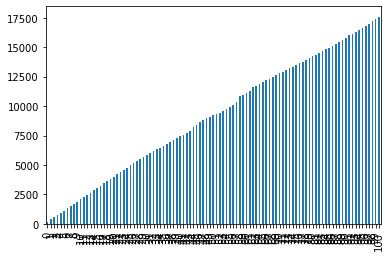

In [8]:
df_rr_intervals491_s10.frame.plot(kind="bar")

In [9]:
rr_intervals = df_rr_intervals491_s10["rr_interval"].values

In [10]:
rr_intervals

array([ 750.     ,  753.90625,  710.9375 ,  699.21875,  738.28125,
        765.625  ,  777.34375,  734.375  ,  707.03125,  742.1875 ,
        753.90625,  769.53125,  734.375  ,  710.9375 ,  753.90625,
        765.625  ,  785.15625,  777.34375,  734.375  ,  726.5625 ,
        753.90625,  769.53125,  796.875  ,  722.65625,  707.03125,
        695.3125 ,  683.59375,  675.78125,  656.25   ,  656.25   ,
        652.34375,  640.625  ,  628.90625,  628.90625,  628.90625,
        621.09375,  613.28125,  609.375  ,  605.46875,  601.5625 ,
        597.65625,  593.75   ,  593.75   , 1210.9375 ,  761.71875,
       1054.6875 ,  609.375  ,  671.875  ,  527.34375,  480.46875,
        218.75   ,  574.21875,  605.46875,  621.09375,  617.1875 ,
        609.375  , 1179.6875 , 1785.15625,  589.84375,  593.75   ,
        597.65625, 1179.6875 ,  589.84375,  593.75   ,  589.84375,
        582.03125,  578.125  ,  582.03125,  574.21875,  562.5    ,
        562.5    ,  566.40625,  562.5    ,  554.6875 ,  558.59

In [11]:
rr_timestamps = np.cumsum(rr_intervals)
rr_timestamps

array([  750.     ,  1503.90625,  2214.84375,  2914.0625 ,  3652.34375,
        4417.96875,  5195.3125 ,  5929.6875 ,  6636.71875,  7378.90625,
        8132.8125 ,  8902.34375,  9636.71875, 10347.65625, 11101.5625 ,
       11867.1875 , 12652.34375, 13429.6875 , 14164.0625 , 14890.625  ,
       15644.53125, 16414.0625 , 17210.9375 , 17933.59375, 18640.625  ,
       19335.9375 , 20019.53125, 20695.3125 , 21351.5625 , 22007.8125 ,
       22660.15625, 23300.78125, 23929.6875 , 24558.59375, 25187.5    ,
       25808.59375, 26421.875  , 27031.25   , 27636.71875, 28238.28125,
       28835.9375 , 29429.6875 , 30023.4375 , 31234.375  , 31996.09375,
       33050.78125, 33660.15625, 34332.03125, 34859.375  , 35339.84375,
       35558.59375, 36132.8125 , 36738.28125, 37359.375  , 37976.5625 ,
       38585.9375 , 39765.625  , 41550.78125, 42140.625  , 42734.375  ,
       43332.03125, 44511.71875, 45101.5625 , 45695.3125 , 46285.15625,
       46867.1875 , 47445.3125 , 48027.34375, 48601.5625 , 49164

In [12]:
start_timestamp = df_rr_intervals491_s10["timestamp"].values[0]  # MODIFY
start_timestamp

'2017-04-10 23:36:55.765625000'

In [13]:
rr_intervals_without_outliers = hrv.remove_outliers(rr_intervals=rr_intervals)
rr_intervals_without_outliers

1 outlier(s) have been deleted.
The outlier(s) value(s) are : [218.75]


[750.0,
 753.90625,
 710.9375,
 699.21875,
 738.28125,
 765.625,
 777.34375,
 734.375,
 707.03125,
 742.1875,
 753.90625,
 769.53125,
 734.375,
 710.9375,
 753.90625,
 765.625,
 785.15625,
 777.34375,
 734.375,
 726.5625,
 753.90625,
 769.53125,
 796.875,
 722.65625,
 707.03125,
 695.3125,
 683.59375,
 675.78125,
 656.25,
 656.25,
 652.34375,
 640.625,
 628.90625,
 628.90625,
 628.90625,
 621.09375,
 613.28125,
 609.375,
 605.46875,
 601.5625,
 597.65625,
 593.75,
 593.75,
 1210.9375,
 761.71875,
 1054.6875,
 609.375,
 671.875,
 527.34375,
 480.46875,
 nan,
 574.21875,
 605.46875,
 621.09375,
 617.1875,
 609.375,
 1179.6875,
 1785.15625,
 589.84375,
 593.75,
 597.65625,
 1179.6875,
 589.84375,
 593.75,
 589.84375,
 582.03125,
 578.125,
 582.03125,
 574.21875,
 562.5,
 562.5,
 566.40625,
 562.5,
 554.6875,
 558.59375,
 554.6875,
 562.5,
 554.6875,
 562.5,
 566.40625,
 570.3125,
 570.3125,
 582.03125,
 593.75,
 621.09375,
 652.34375,
 667.96875,
 683.59375,
 675.78125,
 667.96875,
 671.8

In [14]:
SLIDING_WINDOW = 1_000
SHORT_WINDOW = 10_000  # short window lasts 10 seconds - 10 000 milliseconds
MEDIUM_WINDOW = 60_000  # medium window lasts 60 secondes
LARGE_WINDOW = 150_000 


FEATURES_KEY_TO_INDEX = {
    "interval_index": 0,
    "interval_start_time": 1,  # in milliseconds
    "mean_nni": 2,
    "sdnn": 3,
    "sdsd": 4,
    "nni_50": 5,
    "pnni_50": 6,
    "nni_20": 7,
    "pnni_20": 8,
    "rmssd": 9,
    "median_nni": 10,
    "range_nni": 11,
    "cvsd": 12,
    "cvnni": 13,
    "mean_hr": 14,
    "max_hr": 15,
    "min_hr": 16,
    "std_hr": 17,
    "lf": 18,
    "hf": 19,
    "vlf": 20,
    "lf_hf_ratio": 21,
    "csi": 22,
    "cvi": 23,
    "Modified_csi": 24,
    "sampen": 25,
    "sd1": 26,
    "sd2": 27,
    "ratio_sd2_sd1": 28,
}

In [15]:
cmp_feat = compute_features(
    rr_timestamps, rr_intervals, 
    FEATURES_KEY_TO_INDEX, SLIDING_WINDOW, 
    SHORT_WINDOW, MEDIUM_WINDOW, LARGE_WINDOW)

In [16]:
df_features = pd.DataFrame(
        data=cmp_feat.features, columns=FEATURES_KEY_TO_INDEX
    )


In [17]:
df_features

,interval_index,interval_start_time,mean_nni,sdnn,sdsd,nni_50,pnni_50,nni_20,pnni_20,rmssd,...,hf,vlf,lf_hf_ratio,csi,cvi,Modified_csi,sampen,sd1,sd2,ratio_sd2_sd1
0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,2000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,3000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,4000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,64.0,64000.0,628.417969,45.863101,12.418353,0.0,0.000000,2.0,13.333333,13.902446,...,NaN,NaN,NaN,2.276967,5.490361,1910.802294,0.252947,92.138759,209.796897,2.276967
65,65.0,65000.0,639.160156,38.876510,14.038367,0.0,0.000000,2.0,13.333333,15.262727,...,NaN,NaN,NaN,2.271598,5.484511,1891.266560,0.242592,91.628319,208.142725,2.271598
66,66.0,66000.0,651.562500,30.729482,15.376390,0.0,0.000000,3.0,21.428571,17.122696,...,NaN,NaN,NaN,2.263264,5.487379,1887.089398,0.247982,92.100502,208.447764,2.263264
67,67.0,67000.0,662.760417,34.011197,20.924479,1.0,7.142857,4.0,28.571429,23.714877,...,NaN,NaN,NaN,2.263999,5.488306,1890.025356,0.266843,92.183892,208.704272,2.263999


In [18]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   interval_index       69 non-null     float64
 1   interval_start_time  69 non-null     float64
 2   mean_nni             59 non-null     float64
 3   sdnn                 59 non-null     float64
 4   sdsd                 59 non-null     float64
 5   nni_50               59 non-null     float64
 6   pnni_50              59 non-null     float64
 7   nni_20               59 non-null     float64
 8   pnni_20              59 non-null     float64
 9   rmssd                59 non-null     float64
 10  median_nni           59 non-null     float64
 11  range_nni            59 non-null     float64
 12  cvsd                 59 non-null     float64
 13  cvnni                59 non-null     float64
 14  mean_hr              59 non-null     float64
 15  max_hr               59 non-null     float